In [1]:
import torch 
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

/Users/kush/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#make 1000 samples
n_samples = 1000
X,y = make_moons(n_samples,
                  noise=0.03,
                  random_state=42)

In [3]:
#making df with pandas
import pandas as pd
moons= pd.DataFrame({"X1": X[:, 0],
                     "X2": X[:,1],
                     "lable": y})
moons

,X1,X2,lable
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


In [4]:
X

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       ...,
       [ 1.65391483, -0.29179795],
       [-0.9341017 ,  0.35358221],
       [ 0.7968358 ,  0.60423662]])

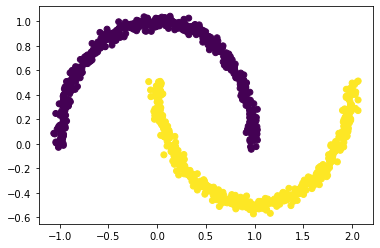

In [16]:
#visualisations
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.show()

In [17]:
#turn data into tensors
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

In [18]:
#two input features and 1 output feature (binary classification)

In [19]:
#train test split
X_moon_train, X_moon_test, y_moon_train, y_moon_test= train_test_split(X,
                                                                       y,
                                                                      test_size=0.2,
                                                                      random_state=42)

In [21]:
X_moon_train.shape, X_moon_test.shape, y_moon_train.shape, y_moon_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [94]:
#builing a model
#subclas nn.Module
class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=8)
        self.layer_2=nn.Linear(in_features=8,out_features=8)
        self.layer_3=nn.Linear(in_features=8,out_features=1)
        self.relu=nn.ReLU()
    
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
    
model_5=MoonModel()
model_5

MoonModel(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [95]:
#accuracy function
#calc accuracy
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred)) * 100
    return acc

In [96]:
#view first 5 outputs of forward pass on test data
model_5.eval()
with torch.inference_mode():
    y_logits=model_5(X_moon_test)[:5]
y_logits

tensor([[-0.0971],
        [-0.2020],
        [-0.1853],
        [-0.1810],
        [-0.3208]])

In [97]:
#use sigmoid activation funtion on our model logits to tun them into prediction probablities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4757],
        [0.4497],
        [0.4538],
        [0.4549],
        [0.4205]])

In [98]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [99]:
#find the predicted lables
y_preds = torch.round(y_pred_probs)

#in full
y_pred_labels=torch.round(torch.sigmoid(model_5(X_moon_test)))[:5]

# check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [115]:
#loss function
loss_fn= nn.BCEWithLogitsLoss()
#optimizer
optimizer=torch.optim.SGD(model_5.parameters(),
                          lr=0.1)

Epoch: 0 | loss:  0.00966, Acc:100.00% | Test loss: 0.00799, Test acc: 100.00%
Epoch: 100 | loss:  0.00824, Acc:100.00% | Test loss: 0.00674, Test acc: 100.00%
Epoch: 200 | loss:  0.00714, Acc:100.00% | Test loss: 0.00579, Test acc: 100.00%
Epoch: 300 | loss:  0.00629, Acc:100.00% | Test loss: 0.00506, Test acc: 100.00%
Epoch: 400 | loss:  0.00560, Acc:100.00% | Test loss: 0.00448, Test acc: 100.00%
Epoch: 500 | loss:  0.00503, Acc:100.00% | Test loss: 0.00401, Test acc: 100.00%
Epoch: 600 | loss:  0.00456, Acc:100.00% | Test loss: 0.00362, Test acc: 100.00%
Epoch: 700 | loss:  0.00416, Acc:100.00% | Test loss: 0.00329, Test acc: 100.00%
Epoch: 800 | loss:  0.00382, Acc:100.00% | Test loss: 0.00301, Test acc: 100.00%
Epoch: 900 | loss:  0.00353, Acc:100.00% | Test loss: 0.00276, Test acc: 100.00%


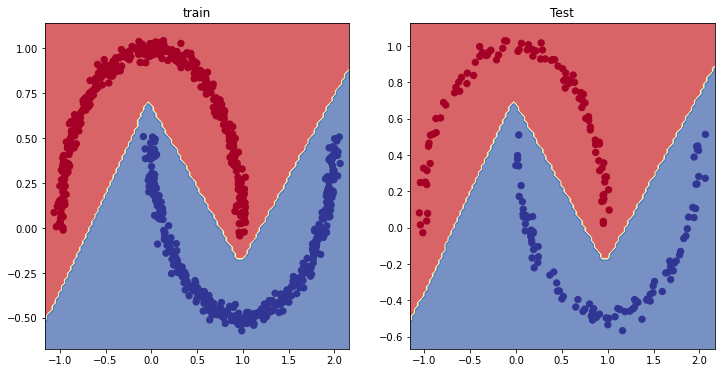

In [120]:
#training loop
torch.manual_seed(42)
epochs=1000
for epoch in range(epochs):
    model_5.train()
    y_logits=model_5(X_moon_train).squeeze()
    y_pred= torch.round(torch.sigmoid(y_logits))
    
    loss=loss_fn(y_logits,y_moon_train)
    acc= accuracy_fn(y_true=y_moon_train,y_pred=y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_5.eval()
    with torch.inference_mode():
        test_logits = model_5(X_moon_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss= loss_fn(test_logits,y_moon_test)
        test_acc= accuracy_fn(y_true=y_moon_test,y_pred=test_pred)
        
    if epoch%100==0:
        print(f"Epoch: {epoch} | loss: {loss: .5f}, Acc:{acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_5,X_moon_train,y_moon_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5,X_moon_test,y_moon_test)       

In [117]:
import requests
from pathlib import Path

#download helper function
if Path("helper_functions.py").is_file():
    print('already downloaded')
else:
    print('downloading....')
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


already downloaded
